In [1]:
import preamble

import apps.generic.dataset as dataset
import examples.dataset as dataset_tool

import pprint as pp
import pandas as pd

In [2]:
trial = "numPointPerSeries_suite_1"
df, spec = dataset.load(bucket="perfd", 
                  app_name="influxdb",
                  trial=trial)
df

,level_0,index,query_latency_max,query_latency_mean,query_latency_min,query_latency_50pc,query_latency_75pc,query_latency_95pc,query_latency_99pc,numServerInstance,...,fieldPerPoint,clientConcurrency,duration,shardDuration,numMeasurement,tagCard,writeConsistency,debug,avg_client_server_lat,tenancy
0,0,0,0.369927,0.341214,0.312315,0.341413,0.354080,0.369927,0.369927,5,...,1,1,10,7d,1,"10,10,10",any,False,85.75,dedicated
1,1,1,0.359233,0.330193,0.309412,0.328160,0.335218,0.359233,0.359233,5,...,1,1,10,7d,1,"10,10,10",any,False,70.50,dedicated
2,2,2,0.366078,0.337383,0.307117,0.335448,0.351218,0.366078,0.366078,5,...,1,1,10,7d,1,"10,10,10",any,False,77.25,dedicated
3,3,3,0.356878,0.329323,0.307725,0.324885,0.338890,0.356878,0.356878,5,...,1,1,10,7d,1,"10,10,10",any,False,81.50,dedicated
4,4,4,0.359992,0.330410,0.302717,0.327030,0.341583,0.359992,0.359992,5,...,1,1,10,7d,1,"10,10,10",any,False,77.75,dedicated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,3.536560,3.446492,3.352968,3.440663,3.499930,3.536560,3.536560,5,...,1,1,10,7d,1,"10,10,10",any,False,85.50,dedicated
196,196,196,3.631160,3.504641,3.370335,3.485190,3.577387,3.631160,3.631160,5,...,1,1,10,7d,1,"10,10,10",any,False,81.50,dedicated
197,197,197,3.619638,3.486655,3.357522,3.497982,3.543615,3.619638,3.619638,5,...,1,1,10,7d,1,"10,10,10",any,False,87.50,dedicated
198,198,198,3.496993,3.397203,3.236600,3.451015,3.469290,3.496993,3.496993,5,...,1,1,10,7d,1,"10,10,10",any,False,76.00,dedicated


adding new figure: Figure(1440x576)

Table 1
rRMSE over raw JCTs
+----------+-----+-----+-----+-----+-------+-----+------+--------+-------+
|  False   |  lr | knn |  rf | svm | svm_k |  nn | best | oracle | naive |
+----------+-----+-----+-----+-----+-------+-----+------+--------+-------+
| influxdb | 1.6 | 2.0 | 1.6 | 1.8 |  1.8  | 1.9 | 1.6  |  1.5   | 159.5 |
+----------+-----+-----+-----+-----+-------+-----+------+--------+-------+
*: best refers to the best score among the models

Oracle score distribution on the complete dataset
+--------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+
| App/RMSRE(%) | 100.0 | 200.0 | 300.0 | 400.0 | 500.0 | 600.0 | 700.0 | 800.0 | 900.0 | 1000.0 |
+--------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+
|   influxdb   |  2.2  |  1.6  |  1.1  |  2.2  |  0.9  |  2.0  |  1.3  |  0.9  |  0.7  |  0.8   |
+--------------+-------+-------+-------+-------+-------+-------+---

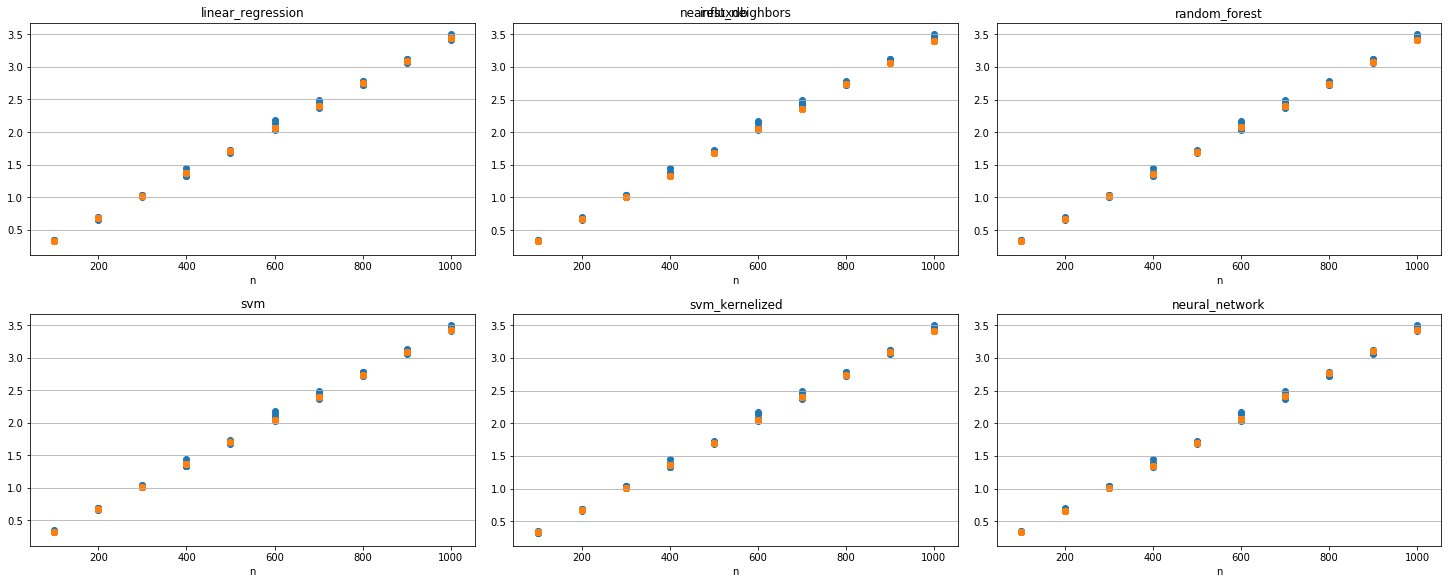

In [3]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "influxdb"
ctx["feature"] = ctx["feature_mode"] = ["numPointPerSeries"]
ctx["target_feature"] = "query_latency_mean"
ctx["testset_ratio"] = 0.5
ctx["retune"] = False
results = dataset_tool.best_case_eval(ctx, {"influxdb": df})

adding new figure: Figure(1440x576)

Table 1
rRMSE over raw JCTs
+----------+-----+-----+-----+-----+-------+-----+------+--------+-------+
|  False   |  lr | knn |  rf | svm | svm_k |  nn | best | oracle | naive |
+----------+-----+-----+-----+-----+-------+-----+------+--------+-------+
| influxdb | 1.9 | 2.2 | 2.1 | 2.0 |  2.2  | 6.4 | 1.9  |  1.9   | 152.6 |
+----------+-----+-----+-----+-----+-------+-----+------+--------+-------+
*: best refers to the best score among the models

Oracle score distribution on the complete dataset
+--------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+
| App/RMSRE(%) | 100.0 | 200.0 | 300.0 | 400.0 | 500.0 | 600.0 | 700.0 | 800.0 | 900.0 | 1000.0 |
+--------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+
|   influxdb   |  2.7  |  1.8  |  1.7  |  2.6  |  1.1  |  2.4  |  1.7  |  1.0  |  1.1  |  0.8   |
+--------------+-------+-------+-------+-------+-------+-------+---

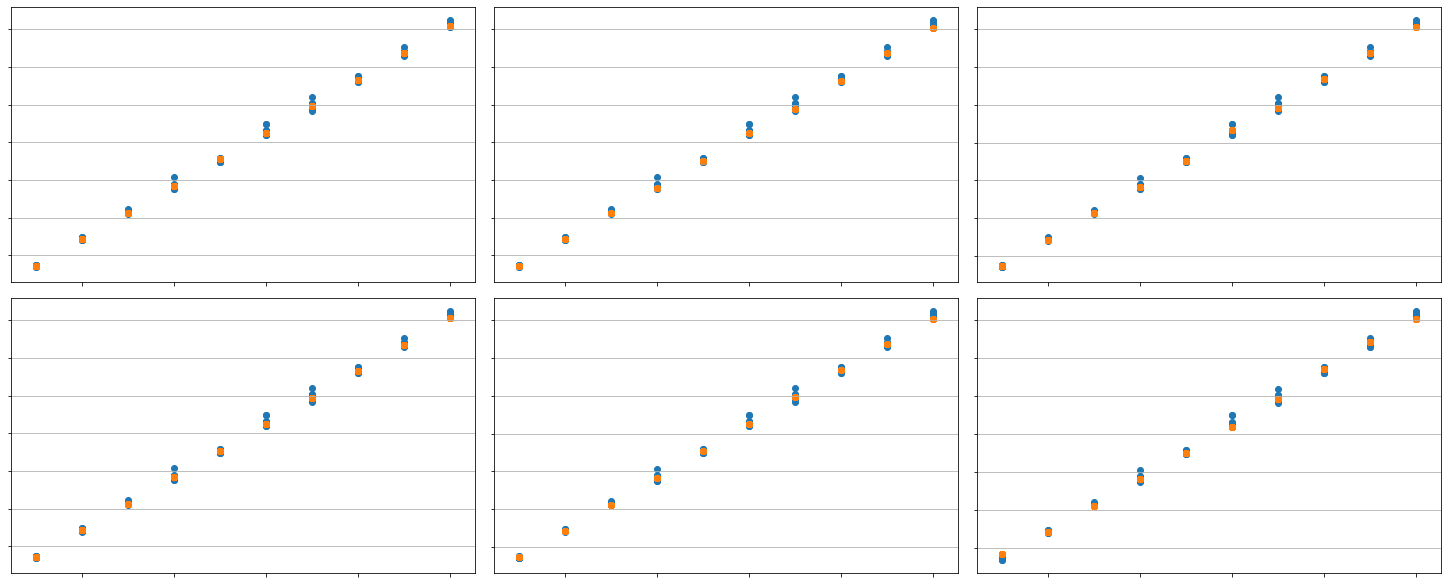

In [5]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "influxdb"
ctx["feature"] = ctx["feature_mode"] = ["numPointPerSeries"]
ctx["target_feature"] = "query_latency_99pc"
ctx["testset_ratio"] = 0.5
ctx["retune"] = False
results = dataset_tool.best_case_eval(ctx, {"influxdb": df})